# Cryptocurrency Liquidity Prediction for Market Stability
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Data Cleaning
* Exploratory data analysis
* Data Pre-Processing
* Model Training 
* Choose best model

## 1) Problem statement.

*  Cryptocurrency markets are highly volatile, and liquidity plays a crucial role in market stability. A lack of liquidity 
can lead to increased price fluctuations and market instability.
* One of the ways predict or make decission on liquidity using ratio of volume to market which determine the supply and demand of the thing.
* Whole purpose of this model is to know that coin is stable of  instable

### **What is liquidity and how it make one risky and instable?**
Liquidity risk is the difficulty in converting assets into cash without causing significant price changes. It occurs when markets lack sufficient buyers or sellers, affecting investments, businesses, and financial institutions, leading to potential delays, higher costs, and financial instability.

## 2. Data Collection
- The dataset is downloaded from https://drive.google.com/drive/folders/1qvXRekLJkdLwoI5dxb86OOx5KooklLGC

### 2.1 Import Data and Required Packages

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

warnings.filterwarnings("ignore")

**We will set the pandas.set_option to display 100 rows or columns. By default it is 60**

In [2]:
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

**Import the CSV Data as Pandas DataFrame**

In [3]:
base_df_2022_03_16 = pd.read_csv('data/coin_gecko_2022-03-16.csv')
base_df_2022_03_17 = pd.read_csv('data/coin_gecko_2022-03-17.csv')

In [4]:
print('Displaying Top Five rows of the following datasets')
print("Crypto Data of listing as of 2022-03-16")
print(base_df_2022_03_16.head())

print("\nCrypto Data of listing as of 2022-03-17")
print(base_df_2022_03_17.head())

Displaying Top Five rows of the following datasets
Crypto Data of listing as of 2022-03-16
       coin symbol         price     1h    24h     7d    24h_volume  \
0   Bitcoin    BTC  40859.460000  0.022  0.030  0.055  3.539076e+10   
1  Ethereum    ETH   2744.410000  0.024  0.034  0.065  1.974870e+10   
2    Tether   USDT      1.000000 -0.001 -0.001  0.000  5.793497e+10   
3       BNB    BNB    383.430000  0.018  0.028  0.004  1.395854e+09   
4  USD Coin   USDC      0.999874 -0.001  0.000 -0.000  3.872274e+09   

        mkt_cap        date  
0  7.709915e+11  2022-03-16  
1  3.271044e+11  2022-03-16  
2  7.996516e+10  2022-03-16  
3  6.404382e+10  2022-03-16  
4  5.222214e+10  2022-03-16  

Crypto Data of listing as of 2022-03-17
       coin symbol         price     1h    24h     7d    24h_volume  \
0   Bitcoin    BTC  40851.380000  0.001  0.000 -0.027  2.047612e+10   
1  Ethereum    ETH   2824.420000  0.004  0.029  0.034  1.364041e+10   
2    Tether   USDT      1.000000 -0.000  0.000  

As we can see the data above there are columns like mkt_cap and 24h_volume with huge float value will convert them to interger and also check the dtypes and info.

In [5]:
print("Crypto Data of listing as of 2022-03-16")
print(base_df_2022_03_16.info())

print("\nCrypto Data of listing as of 2022-03-17")
print(base_df_2022_03_17.info())


Crypto Data of listing as of 2022-03-16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        500 non-null    object 
 1   symbol      500 non-null    object 
 2   price       500 non-null    float64
 3   1h          497 non-null    float64
 4   24h         497 non-null    float64
 5   7d          497 non-null    float64
 6   24h_volume  497 non-null    float64
 7   mkt_cap     500 non-null    float64
 8   date        500 non-null    object 
dtypes: float64(6), object(3)
memory usage: 35.3+ KB
None

Crypto Data of listing as of 2022-03-17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        500 non-null    object 
 1   symbol      500 non-null    object 
 2   price       500 non-null    float

## 3. Exploring Data and some Feature selection

Droping NaN and null values

In [6]:
base_df_2022_03_17.dropna(inplace=True)
base_df_2022_03_16.dropna(inplace=True)

Float Value convertion to integer

In [7]:
col_to_convert = ['mkt_cap', '24h_volume']

def convert_cols_to_int(dfs):
    for df in dfs:
        for j in col_to_convert:
            df[j] = df[j].astype(int)
convert_cols_to_int([base_df_2022_03_16, base_df_2022_03_17])

As of the data we don't require the date column

In [8]:
dfs = [base_df_2022_03_17, base_df_2022_03_16]

for df in dfs:
    df.drop('date', axis=1, inplace=True)

Checking for duplicated values

In [9]:
for df in dfs:
    df[df.duplicated()]

No duplicated values present<br>Now will create a new column called Liquid ratio which is volumn to market_cap

In [10]:
for df in dfs:
    df['Liquidity_Ratio'] = df['24h_volume']/df['mkt_cap']

In [11]:
for df in dfs:
    df.reset_index(drop=True, inplace=True)

A good ratio is between 0.02 and 0.1, meaning that 2% to 10% of the cryptocurrency's total market value is traded daily.

In [12]:
for df in dfs:
    df['volatility'] = pd.cut(
        df['Liquidity_Ratio'],
        bins=[-float('inf'), 0.02, 0.12, float('inf')],
        labels=['Low', 'Stable', 'High']
    )


### <b>Univariate Analysis</b>

##### Distribution of market cap after scaling it using lop1p

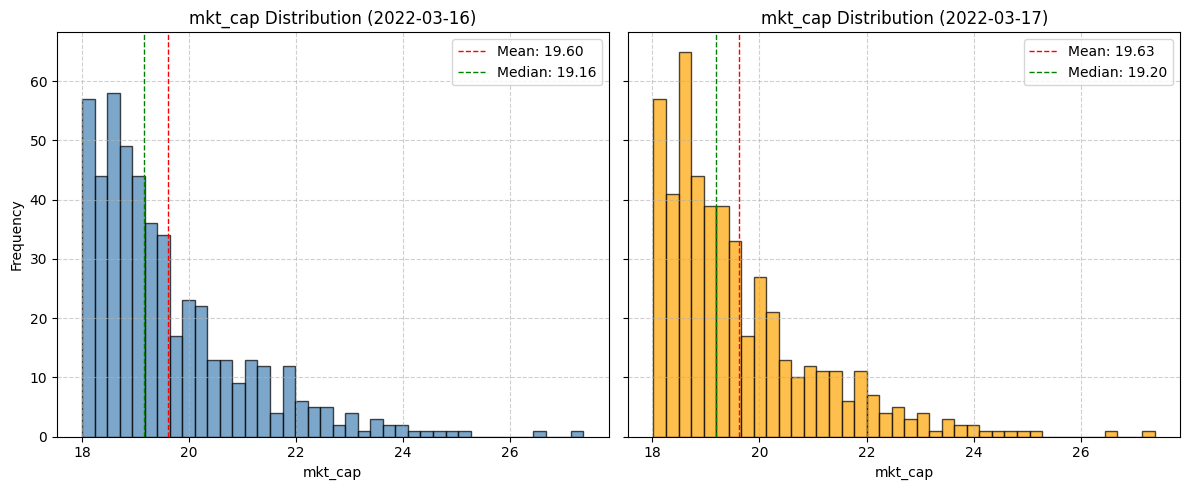

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Data for both dates
data_16 = np.log1p(base_df_2022_03_16['mkt_cap'].dropna())
data_17 = np.log1p(base_df_2022_03_17['mkt_cap'].dropna())

# Plot for 2022-03-16
axes[0].hist(data_16, bins=40, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(data_16.mean(), color='red', linestyle='dashed', linewidth=1, label=f"Mean: {data_16.mean():.2f}")
axes[0].axvline(data_16.median(), color='green', linestyle='dashed', linewidth=1, label=f"Median: {data_16.median():.2f}")
axes[0].set_title("mkt_cap Distribution (2022-03-16)")
axes[0].set_xlabel("mkt_cap")
axes[0].set_ylabel("Frequency")
axes[0].legend()
axes[0].grid(True, linestyle="--", alpha=0.6)

# Plot for 2022-03-17
axes[1].hist(data_17, bins=40, color='orange', edgecolor='black', alpha=0.7)
axes[1].axvline(data_17.mean(), color='red', linestyle='dashed', linewidth=1, label=f"Mean: {data_17.mean():.2f}")
axes[1].axvline(data_17.median(), color='green', linestyle='dashed', linewidth=1, label=f"Median: {data_17.median():.2f}")
axes[1].set_title("mkt_cap Distribution (2022-03-17)")
axes[1].set_xlabel("mkt_cap")
axes[1].legend()
axes[1].grid(True, linestyle="--", alpha=0.6)

# Adjust layout
plt.tight_layout()
plt.show()

##### Observation:
1. We can see the data is right skewed mostly values lying below 22.
2. there are some outlier but not that many.
3. Average market cap being 19.6 and 19.63 respectively
4. Whereas median being 19.16 and 19.20 respectively
5. can see some difference in between mean and median no signifiacant.

##### Distribution of 24h Volumn after scaling it using lop1p

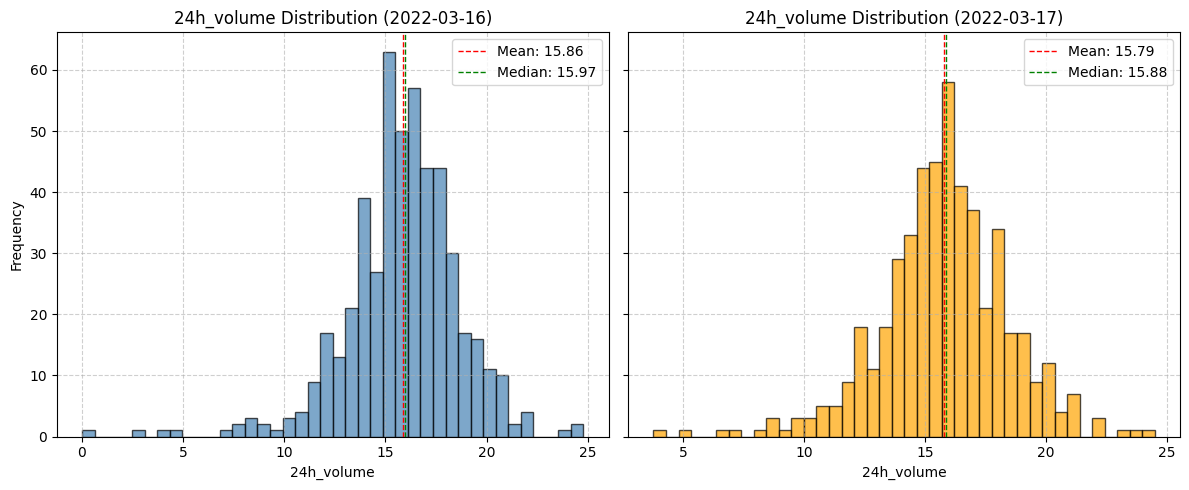

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Data for both dates
data_16 = np.log1p(base_df_2022_03_16['24h_volume'].dropna())
data_17 = np.log1p(base_df_2022_03_17['24h_volume'].dropna())

# Plot for 2022-03-16
axes[0].hist(data_16, bins=40, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(data_16.mean(), color='red', linestyle='dashed', linewidth=1, label=f"Mean: {data_16.mean():.2f}")
axes[0].axvline(data_16.median(), color='green', linestyle='dashed', linewidth=1, label=f"Median: {data_16.median():.2f}")
axes[0].set_title("24h_volume Distribution (2022-03-16)")
axes[0].set_xlabel("24h_volume")
axes[0].set_ylabel("Frequency")
axes[0].legend()
axes[0].grid(True, linestyle="--", alpha=0.6)

# Plot for 2022-03-17
axes[1].hist(data_17, bins=40, color='orange', edgecolor='black', alpha=0.7)
axes[1].axvline(data_17.mean(), color='red', linestyle='dashed', linewidth=1, label=f"Mean: {data_17.mean():.2f}")
axes[1].axvline(data_17.median(), color='green', linestyle='dashed', linewidth=1, label=f"Median: {data_17.median():.2f}")
axes[1].set_title("24h_volume Distribution (2022-03-17)")
axes[1].set_xlabel("24h_volume")
axes[1].legend()
axes[1].grid(True, linestyle="--", alpha=0.6)

# Adjust layout
plt.tight_layout()
plt.show()

##### Observation:
1. We can see the data is normally distributed.
2. there are some outlier and underlier but not that many or significant.
3. Average Volumn being 15.86 and 15.79 respectively.
4. Whereas median being 15.97 and 15.88 respectively.
5. there is no difference in the mean and median which is good.

##### Distribution of Liquidity_Ratio

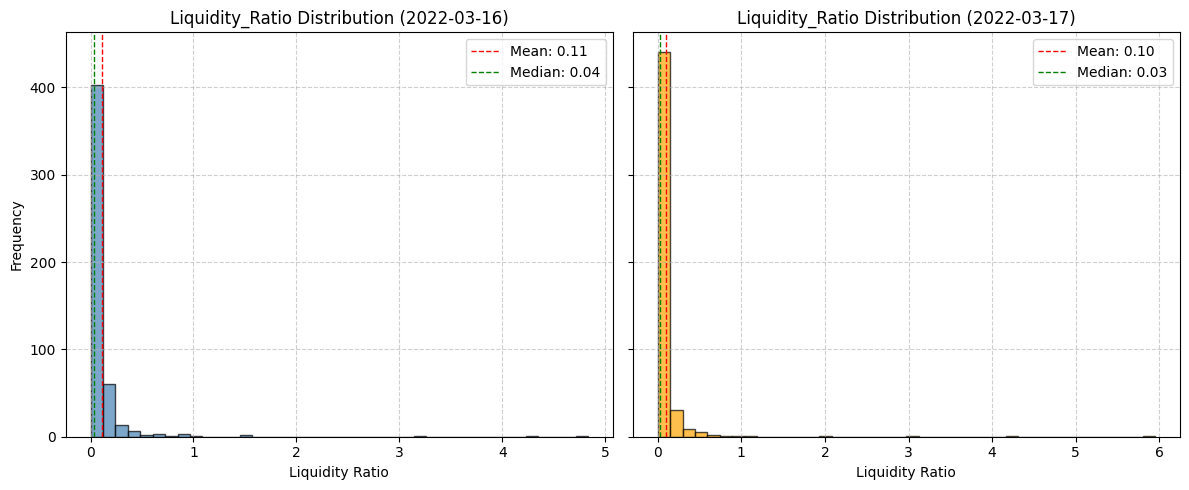

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Data for both dates
data_16 = base_df_2022_03_16['Liquidity_Ratio'].dropna()
data_17 = base_df_2022_03_17['Liquidity_Ratio'].dropna()

# Plot for 2022-03-16
axes[0].hist(data_16, bins=40, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(data_16.mean(), color='red', linestyle='dashed', linewidth=1, label=f"Mean: {data_16.mean():.2f}")
axes[0].axvline(data_16.median(), color='green', linestyle='dashed', linewidth=1, label=f"Median: {data_16.median():.2f}")
axes[0].set_title("Liquidity_Ratio Distribution (2022-03-16)")
axes[0].set_xlabel("Liquidity Ratio")
axes[0].set_ylabel("Frequency")
axes[0].legend()
axes[0].grid(True, linestyle="--", alpha=0.6)

# Plot for 2022-03-17
axes[1].hist(data_17, bins=40, color='orange', edgecolor='black', alpha=0.7)
axes[1].axvline(data_17.mean(), color='red', linestyle='dashed', linewidth=1, label=f"Mean: {data_17.mean():.2f}")
axes[1].axvline(data_17.median(), color='green', linestyle='dashed', linewidth=1, label=f"Median: {data_17.median():.2f}")
axes[1].set_title("Liquidity_Ratio Distribution (2022-03-17)")
axes[1].set_xlabel("Liquidity Ratio")
axes[1].legend()
axes[1].grid(True, linestyle="--", alpha=0.6)

# Adjust layout
plt.tight_layout()
plt.show()

Lets Try without outliers

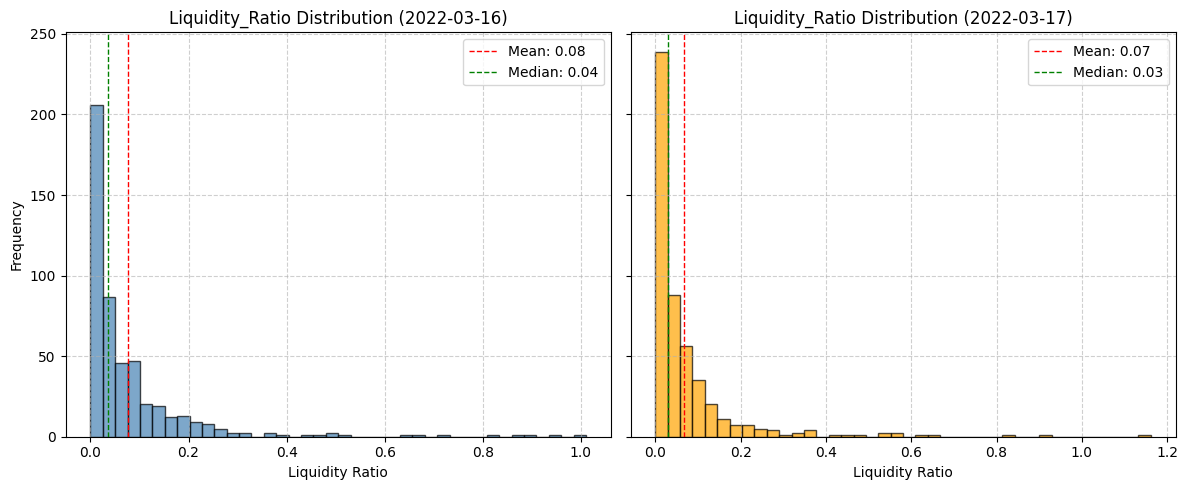

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Data for both dates
data_16 = base_df_2022_03_16['Liquidity_Ratio'].dropna()
data_17 = base_df_2022_03_17['Liquidity_Ratio'].dropna()

data_16 = data_16[data_16 < 1.25]
data_17 = data_17[data_17 < 1.25]

# Plot for 2022-03-16
axes[0].hist(data_16, bins=40, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(data_16.mean(), color='red', linestyle='dashed', linewidth=1, label=f"Mean: {data_16.mean():.2f}")
axes[0].axvline(data_16.median(), color='green', linestyle='dashed', linewidth=1, label=f"Median: {data_16.median():.2f}")
axes[0].set_title("Liquidity_Ratio Distribution (2022-03-16)")
axes[0].set_xlabel("Liquidity Ratio")
axes[0].set_ylabel("Frequency")
axes[0].legend()
axes[0].grid(True, linestyle="--", alpha=0.6)

# Plot for 2022-03-17
axes[1].hist(data_17, bins=40, color='orange', edgecolor='black', alpha=0.7)
axes[1].axvline(data_17.mean(), color='red', linestyle='dashed', linewidth=1, label=f"Mean: {data_17.mean():.2f}")
axes[1].axvline(data_17.median(), color='green', linestyle='dashed', linewidth=1, label=f"Median: {data_17.median():.2f}")
axes[1].set_title("Liquidity_Ratio Distribution (2022-03-17)")
axes[1].set_xlabel("Liquidity Ratio")
axes[1].legend()
axes[1].grid(True, linestyle="--", alpha=0.6)

# Adjust layout
plt.tight_layout()
plt.show()

##### Observation:
1. We can see the data is higly right skewed. where it means most of the coins are stable.
2. there are some outlier.
3. Average being 0.08 and 0.07 respectively.
4. Whereas median being 0.04 and 0.03 respectively.
5. there is a difference between mean and median which shows the data is affected by the outliers

##### Distribution of Liquidity_Ratio

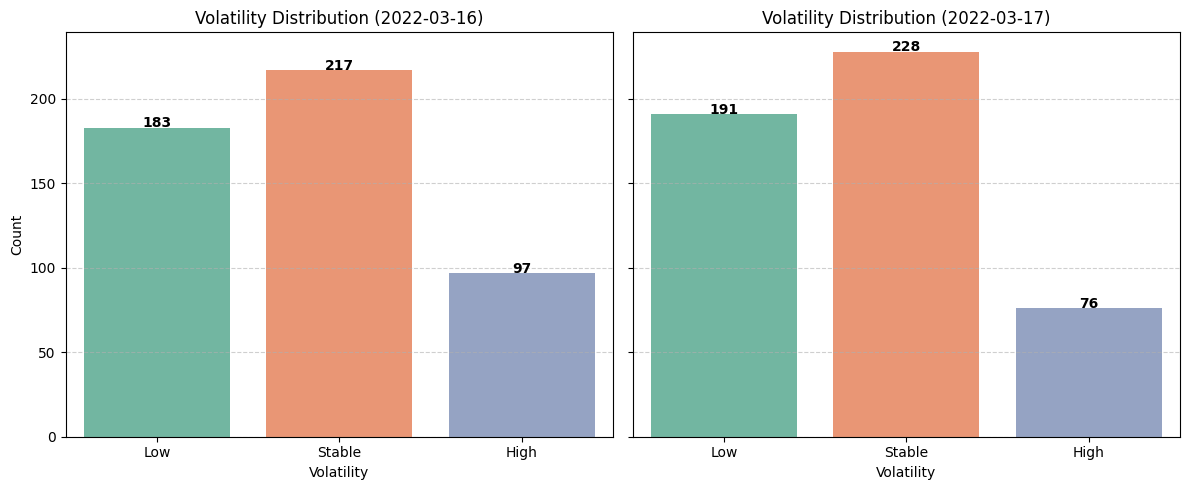

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# 2022-03-16
ax0 = sns.countplot(x=base_df_2022_03_16['volatility'], 
                    palette="Set2", ax=axes[0])
axes[0].set_title("Volatility Distribution (2022-03-16)")
axes[0].set_xlabel("Volatility")
axes[0].set_ylabel("Count")
axes[0].grid(axis="y", linestyle="--", alpha=0.6)

# Add counts on bars
for p in ax0.patches:
    height = p.get_height()
    ax0.text(p.get_x() + p.get_width() / 2, height + 0.2, 
             int(height), ha="center", fontsize=10, fontweight="bold")

# 2022-03-17
ax1 = sns.countplot(x=base_df_2022_03_17['volatility'], 
                    palette="Set2", ax=axes[1])
axes[1].set_title("Volatility Distribution (2022-03-17)")
axes[1].set_xlabel("Volatility")
axes[1].set_ylabel("")
axes[1].grid(axis="y", linestyle="--", alpha=0.6)

# Add counts on bars
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2, height + 0.2, 
             int(height), ha="center", fontsize=10, fontweight="bold")

plt.tight_layout()
plt.show()

##### Observation:
1. We can see the data most of the coins are stable.
2. As on 16-3 there were 217 stable, 97 high and 183 were low Liquid coins.
3. As on 17-3 there were 228 stable, 76 high and 191 were low Liquid coins.

##### Distribution of %change in different period

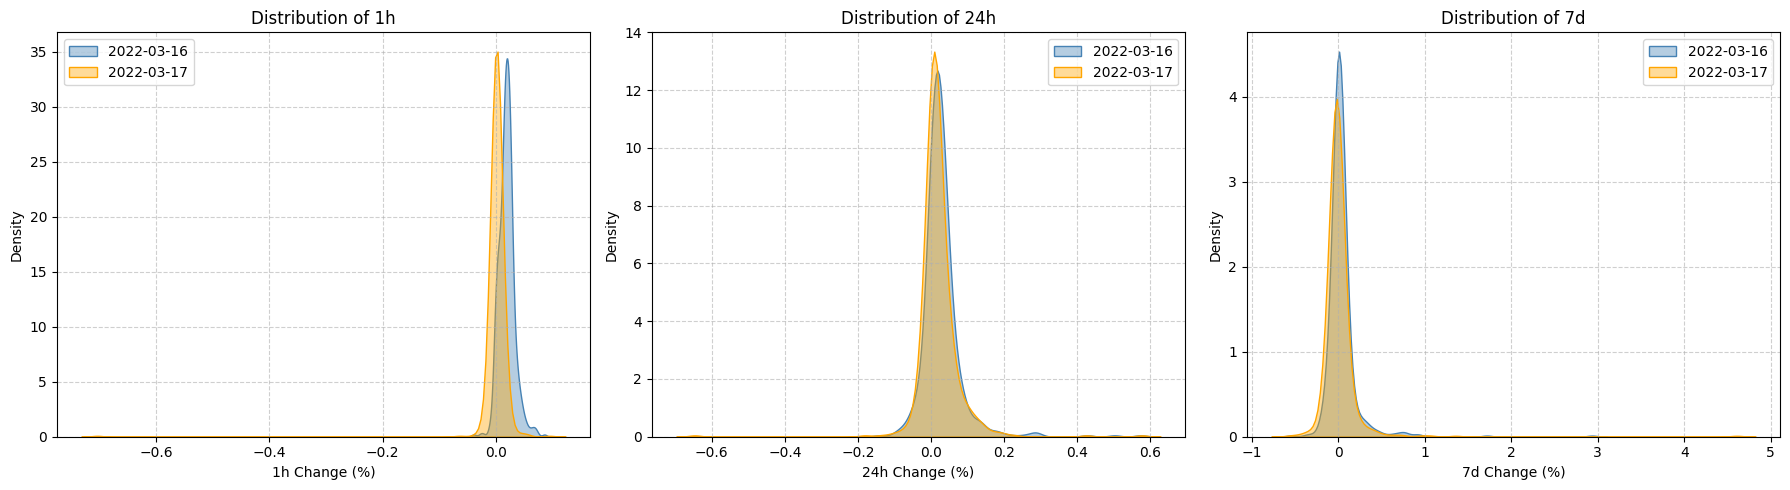

In [18]:
cols = ['1h', '24h', '7d']

# Prepare subplots: one for each column
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

for i, col in enumerate(cols):
    # Plot KDE for 2022-03-16
    sns.kdeplot(base_df_2022_03_16[col].dropna(), 
                fill=True, alpha=0.4, color="steelblue", 
                label="2022-03-16", ax=axes[i])
    
    # Plot KDE for 2022-03-17
    sns.kdeplot(base_df_2022_03_17[col].dropna(), 
                fill=True, alpha=0.4, color="orange", 
                label="2022-03-17", ax=axes[i])
    
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(f"{col} Change (%)")
    axes[i].set_ylabel("Density")
    axes[i].grid(True, linestyle="--", alpha=0.6)
    axes[i].legend()

plt.tight_layout()
plt.show()

##### Observation:
1. for percentage change both the days for period 1h most of value are ranging between -0.05 - 0.1.
2. for period 24h most of value are ranging between -0.2 - 0.2.
3. for period 7d most of value are ranging between -1 - 1.


### <b>Bivariate Analysis</b> 

##### Correlation numerical columns

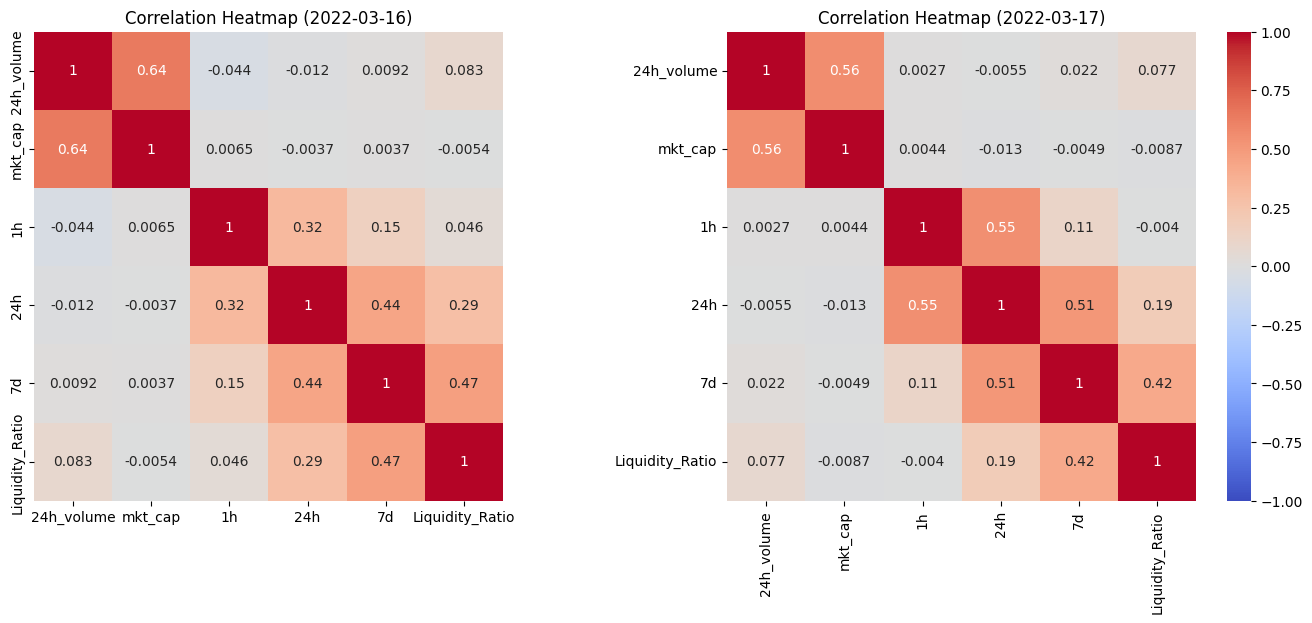

In [19]:
num_cols = ['24h_volume', 'mkt_cap', '1h', '24h', '7d', 'Liquidity_Ratio']
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Correlation for 2022-03-16
sns.heatmap(base_df_2022_03_16[num_cols].corr(), 
            annot=True, cmap="coolwarm", center=0,
            vmin=-1, vmax=1, square=True, 
            cbar=False, ax=axes[0])
axes[0].set_title("Correlation Heatmap (2022-03-16)", fontsize=12)

# Correlation for 2022-03-17
sns.heatmap(base_df_2022_03_17[num_cols].corr(), 
            annot=True, cmap="coolwarm", center=0,
            vmin=-1, vmax=1, square=True, 
            cbar=True, ax=axes[1])  # keep cbar only on second
axes[1].set_title("Correlation Heatmap (2022-03-17)", fontsize=12)

plt.tight_layout()
plt.show()

##### Observation:
1. from the heatmap we can see there is a correlation between mkt_cap and 24h_volume.
2. and sough of in 7d with liquidity ratio also 24h.

##### Variance Inflation Factor (VIF)

In [20]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df, cols):
    """Return VIF DataFrame for given numeric columns."""
    X = df[cols].dropna()  # drop missing values
    X = sm.add_constant(X)  # add constant for intercept
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                       for i in range(X.shape[1])]
    return vif_data.drop(index=0)  # drop 'const'

# VIF for both datasets
vif_16 = calculate_vif(base_df_2022_03_16, num_cols)
vif_17 = calculate_vif(base_df_2022_03_17, num_cols)

print("VIF (2022-03-16):")
print(vif_16, "\n")

print("VIF (2022-03-17):")
print(vif_17)

VIF (2022-03-16):
           Feature       VIF
1       24h_volume  1.742050
2          mkt_cap  1.724722
3               1h  1.124173
4              24h  1.372570
5               7d  1.480954
6  Liquidity_Ratio  1.318837 

VIF (2022-03-17):
           Feature       VIF
1       24h_volume  1.471195
2          mkt_cap  1.461982
3               1h  1.525206
4              24h  2.029771
5               7d  1.652804
6  Liquidity_Ratio  1.231304


##### Observation:
1. from the following VIF chart we can see that all the feature are good to use no inter correlation.
scale 1-5 as better


##### Market with Volume where hue is Volatility

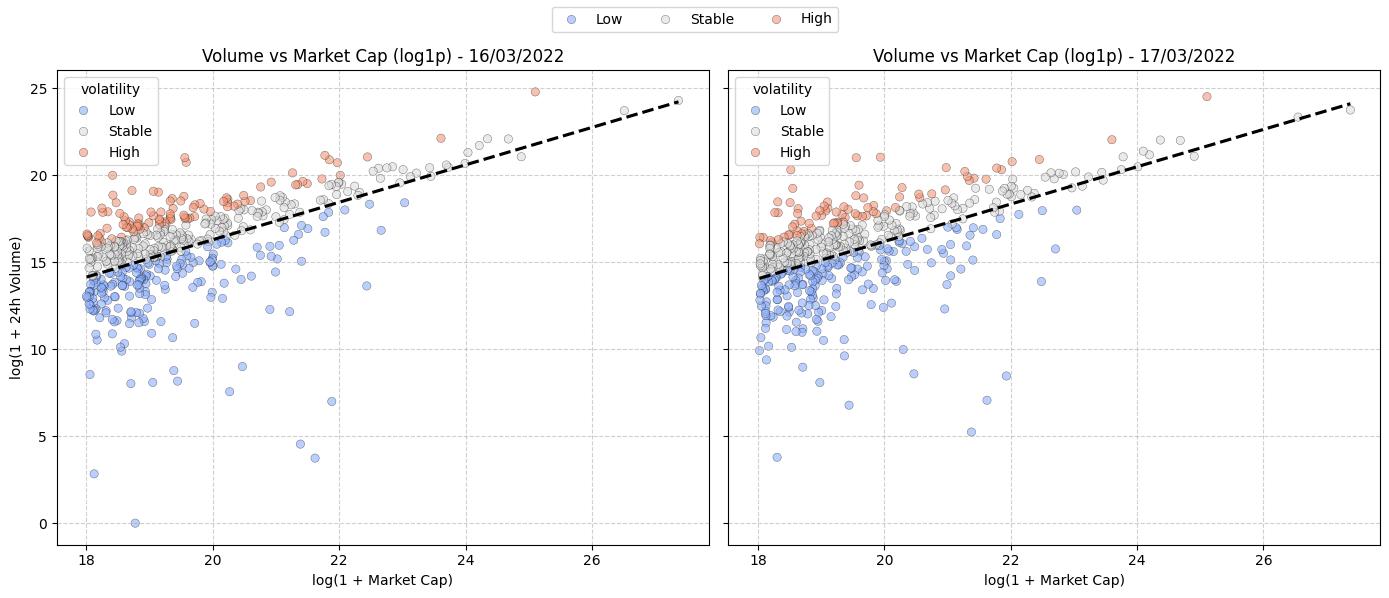

In [21]:
data_16_mkt_cap = np.log1p(base_df_2022_03_16['mkt_cap'].dropna())
data_17_mkt_cap = np.log1p(base_df_2022_03_17['mkt_cap'].dropna())
data_16_vol = np.log1p(base_df_2022_03_16['24h_volume'].dropna())
data_17_vol = np.log1p(base_df_2022_03_17['24h_volume'].dropna())

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True, sharex=True)

# --- 2022-03-16 ---
sns.scatterplot(
    x=data_16_mkt_cap,
    y=data_16_vol,
    hue=base_df_2022_03_16['volatility'],
    sizes=(20, 200),
    palette="coolwarm",
    alpha=0.6,
    edgecolor="black",
    linewidth=0.3,
    ax=axes[0]
)
sns.regplot(x=data_16_mkt_cap, y=data_16_vol, 
            scatter=False, color="black", ax=axes[0], ci=None, line_kws={"linestyle": "--"})
axes[0].set_title("Volume vs Market Cap (log1p) - 16/03/2022", fontsize=12)
axes[0].set_xlabel("log(1 + Market Cap)")
axes[0].set_ylabel("log(1 + 24h Volume)")
axes[0].grid(True, linestyle="--", alpha=0.6)

# --- 2022-03-17 ---
sns.scatterplot(
    x=data_17_mkt_cap,
    y=data_17_vol,
    hue=base_df_2022_03_17['volatility'],
    sizes=(20, 200),
    palette="coolwarm",
    alpha=0.6,
    edgecolor="black",
    linewidth=0.3,
    ax=axes[1]
)
sns.regplot(x=data_17_mkt_cap, y=data_17_vol, 
            scatter=False, color="black", ax=axes[1], ci=None, line_kws={"linestyle": "--"})
axes[1].set_title("Volume vs Market Cap (log1p) - 17/03/2022", fontsize=12)
axes[1].set_xlabel("log(1 + Market Cap)")
axes[1].set_ylabel("")
axes[1].grid(True, linestyle="--", alpha=0.6)

# Common legend
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=4, frameon=True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

##### Observation:
1. we can see the cut-off on the plot.
2. the cut-off below that most of the coin are low liquid.
3. And above that stable and above Stable there are Highly Liquid coins.



### <b>Multivariate interaction</b> 

##### Market Cap vs Volume vs Liquid Ratio with hue Volatility

In [22]:
data_16_mkt_cap = np.log1p(base_df_2022_03_16['mkt_cap'].dropna())
data_17_mkt_cap = np.log1p(base_df_2022_03_17['mkt_cap'].dropna())
data_16_vol = np.log1p(base_df_2022_03_16['24h_volume'].dropna())
data_17_vol = np.log1p(base_df_2022_03_17['24h_volume'].dropna())
data_16_ratio = base_df_2022_03_16['Liquidity_Ratio']
data_17_ratio = base_df_2022_03_17['Liquidity_Ratio']

fig16 = px.scatter_3d(
    x=data_16_mkt_cap,
    y=data_16_vol,
    z=data_16_ratio,
    color=base_df_2022_03_16['volatility'],
    size=data_16_mkt_cap,   # bubble size ~ market cap
    opacity=0.7,
    title="3D Plot: Market Cap vs Volume vs Liquidity Ratio (2022-03-16)",
    labels={
        "x": "log(1 + Market Cap)",
        "y": "log(1 + 24h Volume)",
        "z": "Liquidity Ratio",
        "color": "Volatility"
    }
)
fig16.update_traces(marker=dict(line=dict(width=0.5, color='black')))
fig16.show()

# --- Plot for 2022-03-17 ---
fig17 = px.scatter_3d(
    x=data_17_mkt_cap,
    y=data_17_vol,
    z=data_17_ratio,
    color=base_df_2022_03_17['volatility'],
    size=data_17_mkt_cap,
    opacity=0.7,
    title="3D Plot: Market Cap vs Volume vs Liquidity Ratio (2022-03-17)",
    labels={
        "x": "log(1 + Market Cap)",
        "y": "log(1 + 24h Volume)",
        "z": "Liquidity Ratio",
        "color": "Volatility"
    }
)
fig17.update_traces(marker=dict(line=dict(width=0.5, color='black')))
fig17.show()


##### Observation:
* We can see the data is well clustered in the 3D plot.


### <b>Performance Analysis</b> 

For performance analysis we will only 16-03-2022 data as no point of using both days data.

In [23]:
performance_analysis_df = base_df_2022_03_16.copy()

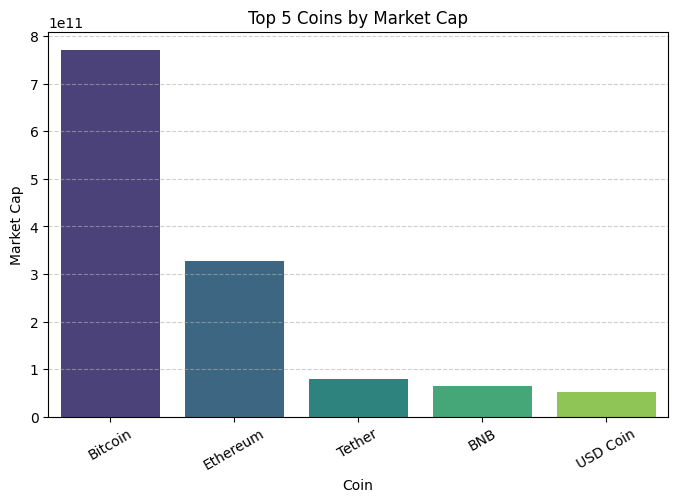

In [24]:
mkt_cap_analysis_df = performance_analysis_df.sort_values(by='mkt_cap', ascending=False)
top_5 = mkt_cap_analysis_df[['coin', 'mkt_cap']].head(5)

# Barplot
plt.figure(figsize=(8,5))
sns.barplot(data=top_5, x='coin', y='mkt_cap', palette="viridis")

plt.title("Top 5 Coins by Market Cap")
plt.xlabel("Coin")
plt.ylabel("Market Cap")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

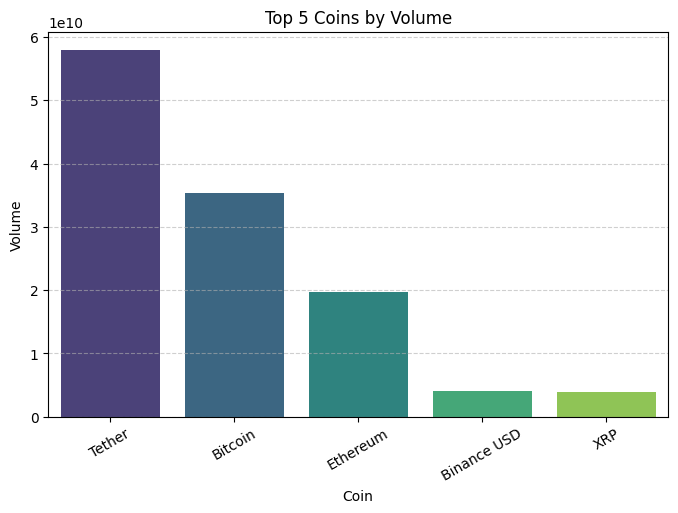

In [25]:
vol_analysis_df = performance_analysis_df.sort_values(by='24h_volume', ascending=False)
top_5 = vol_analysis_df[['coin', '24h_volume']].head(5)

# Barplot
plt.figure(figsize=(8,5))
sns.barplot(data=top_5, x='coin', y='24h_volume', palette="viridis")

plt.title("Top 5 Coins by Volume")
plt.xlabel("Coin")
plt.ylabel("Volume")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

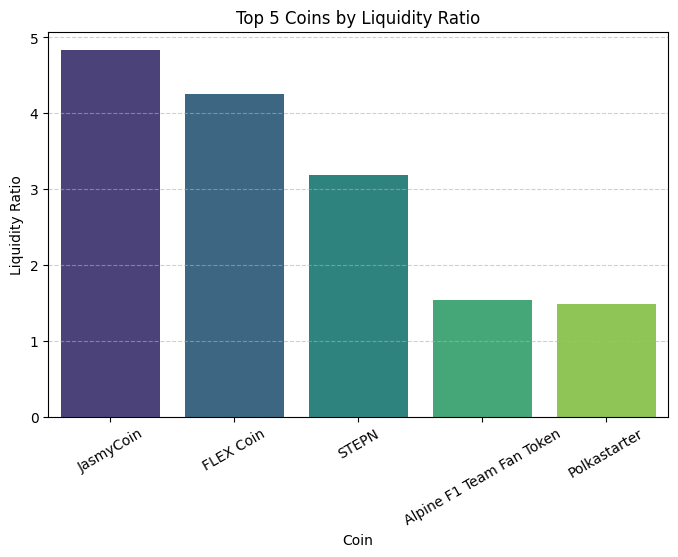

In [26]:
liquid_analysis_df = performance_analysis_df.sort_values(by='Liquidity_Ratio', ascending=False)
top_5 = liquid_analysis_df[['coin', 'Liquidity_Ratio']].head(5)

# Barplot
plt.figure(figsize=(8,5))
sns.barplot(data=top_5, x='coin', y='Liquidity_Ratio', palette="viridis")

plt.title("Top 5 Coins by Liquidity Ratio")
plt.xlabel("Coin")
plt.ylabel("Liquidity Ratio")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

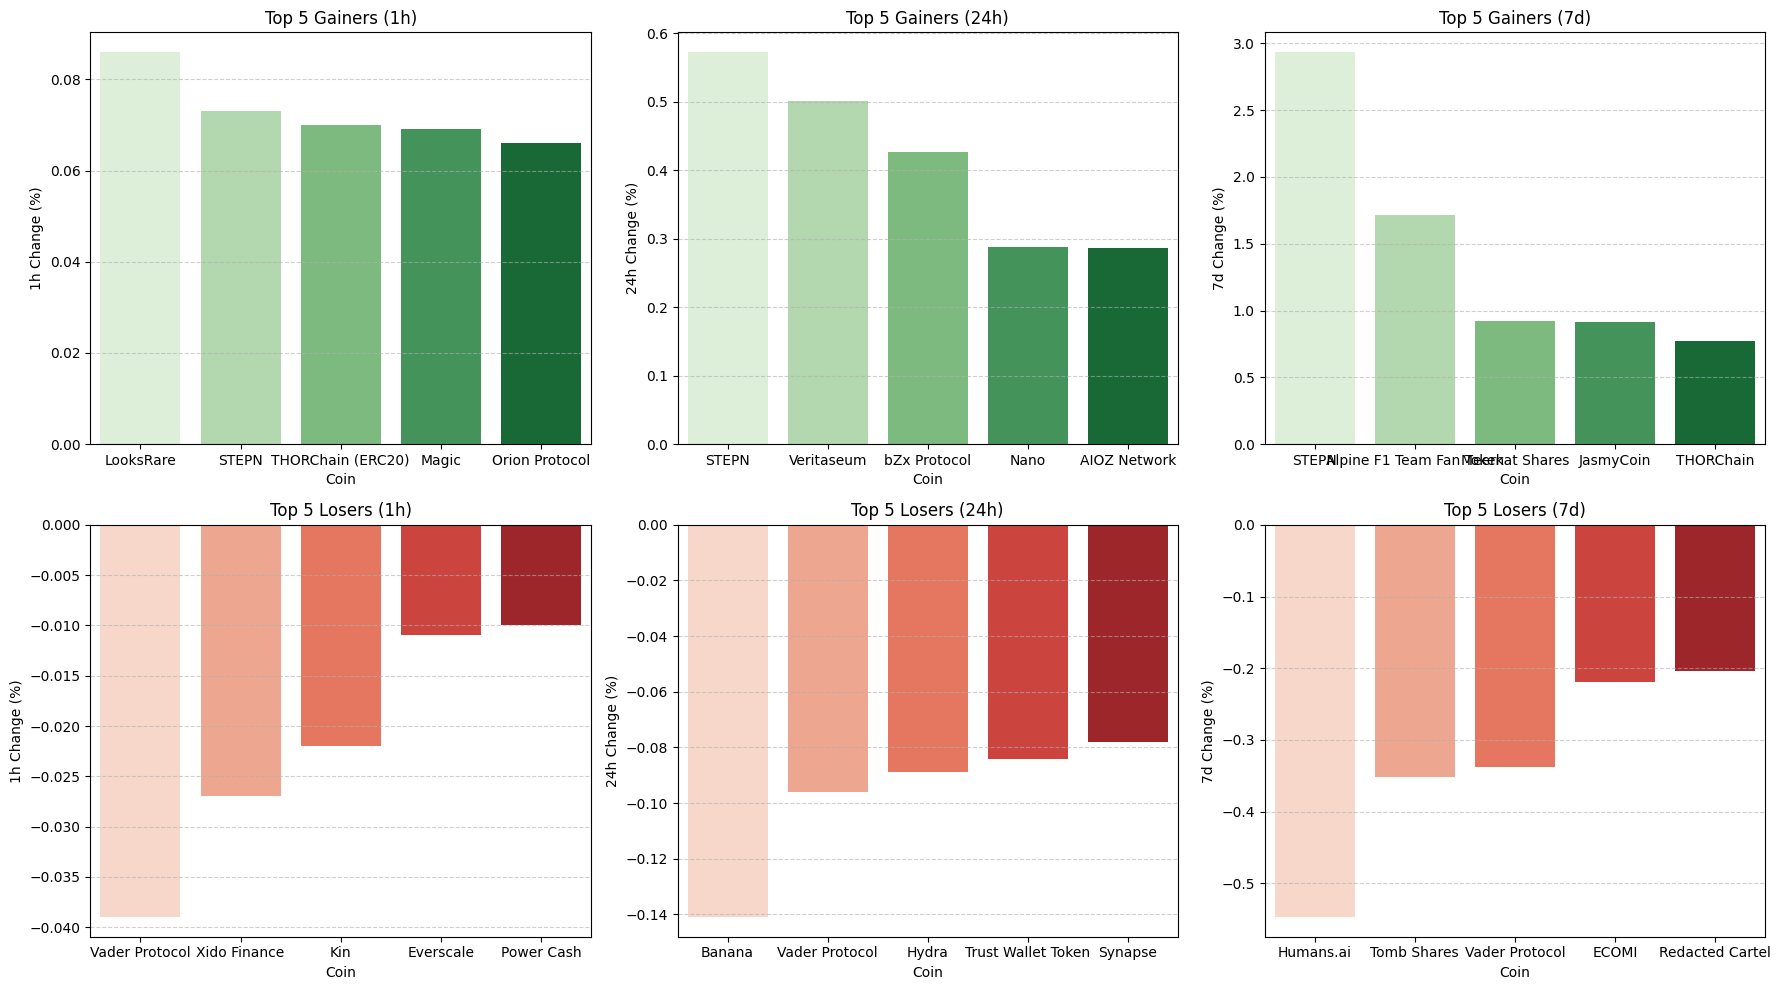

In [27]:
intervals = ['1h', '24h', '7d']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns
axes = axes.flatten()

for i, col in enumerate(intervals):
    # Top 5 Gainers
    top_gainers = performance_analysis_df.sort_values(by=col, ascending=False).head(5)
    sns.barplot(data=top_gainers, x='coin', y=col, palette="Greens", ax=axes[i])
    axes[i].set_title(f"Top 5 Gainers ({col})")
    axes[i].set_ylabel(f"{col} Change (%)")
    axes[i].set_xlabel("Coin")
    axes[i].grid(axis="y", linestyle="--", alpha=0.6)
    
    # Top 5 Losers
    top_losers = performance_analysis_df.sort_values(by=col, ascending=True).head(5)
    sns.barplot(data=top_losers, x='coin', y=col, palette="Reds", ax=axes[i+3])
    axes[i+3].set_title(f"Top 5 Losers ({col})")
    axes[i+3].set_ylabel(f"{col} Change (%)")
    axes[i+3].set_xlabel("Coin")
    axes[i+3].grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

**As we have done feature selection in EDA we will be saving the data for the final model prepration**<br>
**Keeping in the mind as the problem statement is to find stable coin. From the following data provided we can only judge using ratio like Liquidity. Which is computed.**

In [28]:
base_df_2022_03_16.to_csv('data/clean_data_20220316.csv')
base_df_2022_03_17.to_csv('data/clean_data_20220317.csv')

## Final report
* From the following to the problem statement we have found column Date is not usefull which is been droped.
* Then to predict wheather coin is stable or not we used a method called Liquidity ration which is also computed and set a cut-off 0.02 of 0.1.